In [262]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "ovary-and-testis-gene-and-transcript-abundance"

In [263]:
# Load necessary libraries
library(dplyr)
library(ggplot2)

# Load the transcript abundance data for both ovary and testis replicates
ovary_replicate1_transcript <- read.table("/kaggle/input/ovary-and-testis-gene-and-transcript-abundance/transcript_abundance_ovary_replicate1.tab", header = TRUE, sep = "\t")
ovary_replicate2_transcript <- read.table("/kaggle/input/ovary-and-testis-gene-and-transcript-abundance/transcript_abundance_ovary_replicate2.tab", header = TRUE, sep = "\t")
testis_replicate1_transcript <- read.table("/kaggle/input/ovary-and-testis-gene-and-transcript-abundance/transcript_abundance_testis_replicate1.tab", header = TRUE, sep = "\t")
testis_replicate2_transcript <- read.table("/kaggle/input/ovary-and-testis-gene-and-transcript-abundance/transcript_abundance_testis_replicate1.tab", header = TRUE, sep = "\t")

testis_merged_transcript <- bind_rows(testis_replicate1_transcript, testis_replicate2_transcript)
ovary_merged_transcript <- bind_rows(ovary_replicate1_transcript, ovary_replicate2_transcript)

# Calculate the average transcript abundance for ovary and testis
avg_abundance_ovary <- rowMeans(ovary_merged_transcript[, 7:9])
avg_abundance_testis <- rowMeans(testis_merged_transcript[, 7:9])

# Calculate the log fold change (r_g)
log_fold_change_transcript <- log2((1 + avg_abundance_ovary) / (1 + avg_abundance_testis))

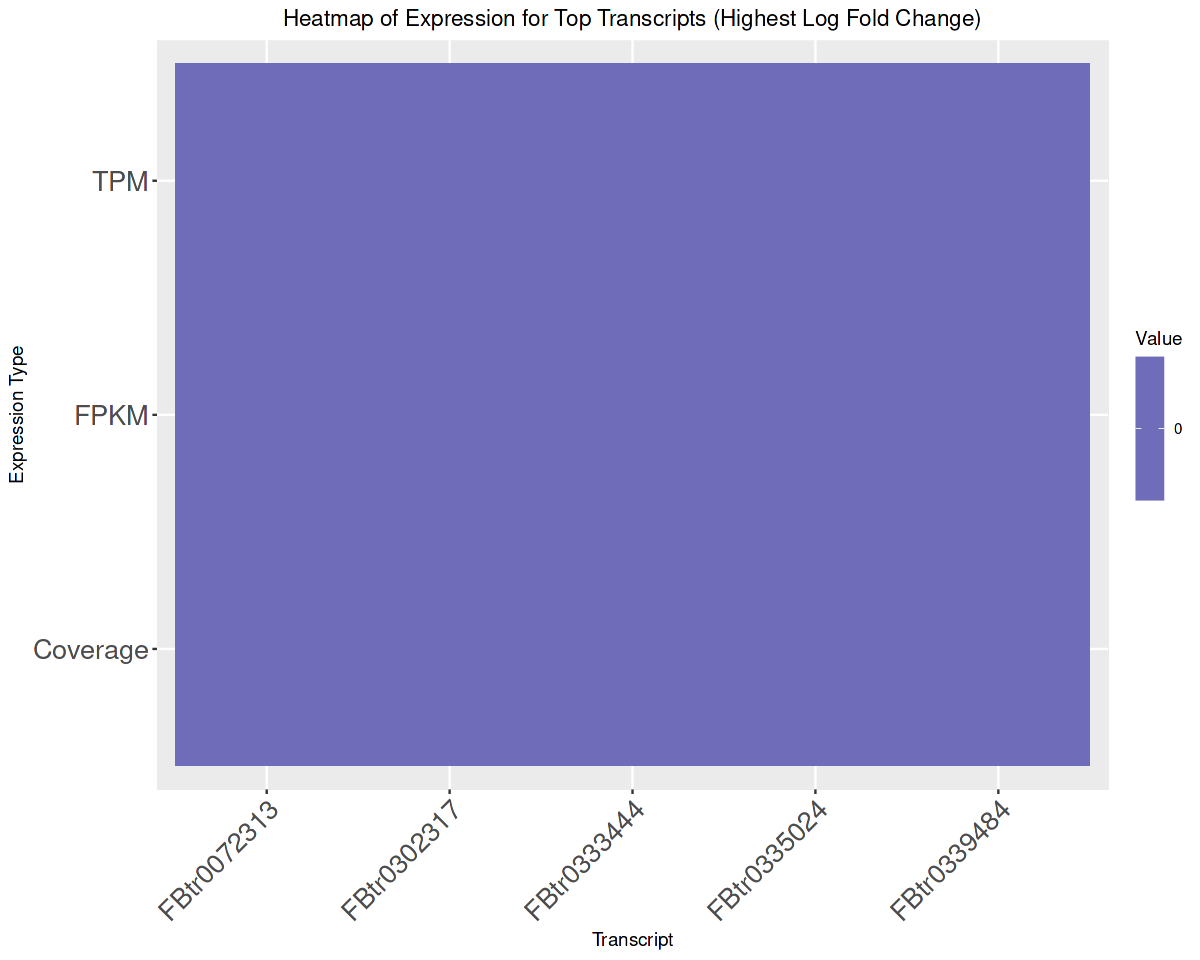

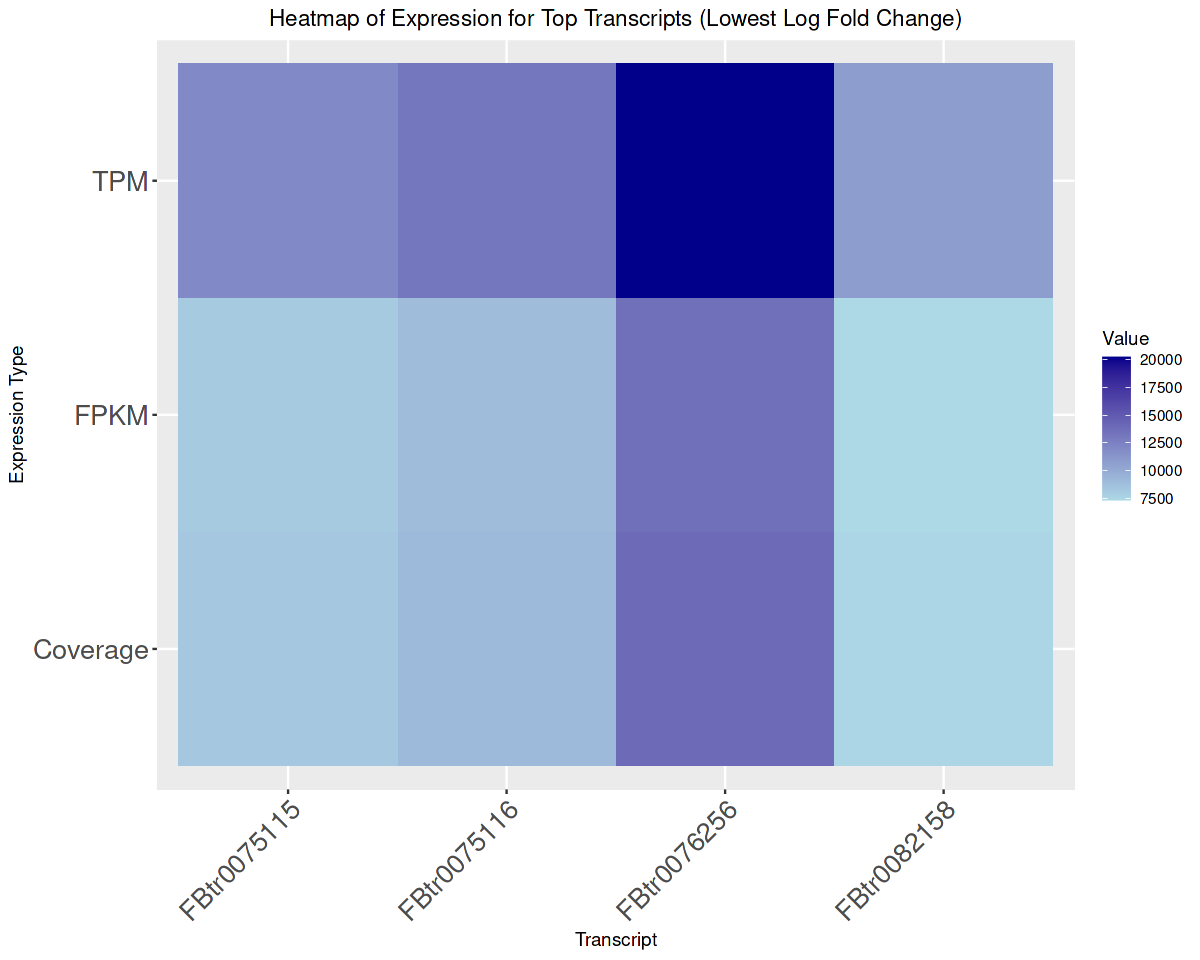

In [264]:
# Add the log fold change values to the data
testis_merged_transcript$log_fold_change_transcript <- log_fold_change_transcript

#HIGHEST
# Find the top transcripts with the greatest and lowest log fold change values
top_transcripts_greatest <- testis_merged_transcript %>% arrange(desc(log_fold_change_transcript)) %>% head(5)


# Visualize the expression of top transcripts using a boxplot
# Assuming the columns "Coverage" to "TPM" represent expression values
top_transcripts_names_greatest <- c(top_transcripts_greatest$Transcript.ID)
top_testis_transcripts_highest <- top_transcripts_names_greatest

# Filter data for top transcripts
testis_merged_transcript_filtered <- testis_merged_transcript %>%
  filter(Transcript.ID %in% top_transcripts_names_greatest)

# Pivot the data for heatmap visualization
heatmap_data <- testis_merged_transcript_filtered %>%
  select(Transcript.ID, Coverage:TPM) %>%
  pivot_longer(cols = -Transcript.ID, names_to = "Expression", values_to = "Value")

# Create a heatmap
options(repr.plot.width = 10, repr.plot.height = 8) 
ggplot(heatmap_data, aes(x = Transcript.ID, y = Expression, fill = Value)) +
  geom_tile() +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "Heatmap of Expression for Top Transcripts (Highest Log Fold Change)",
       x = "Transcript",
       y = "Expression Type") +
  theme(axis.text.x = element_text(size = 16, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 16),plot.title = element_text(hjust = 0.5))


#LOWEST
top_transcripts_lowest <- testis_merged_transcript %>% arrange(log_fold_change_transcript) %>% head(5)
top_transcripts_names_lowest <- c(top_transcripts_lowest$Transcript.ID)
top_testis_transcripts_lowest <- top_transcripts_names_lowest

# Filter data for top transcripts
testis_merged_transcript_filtered <- testis_merged_transcript %>%
  filter(Transcript.ID %in% top_transcripts_names_lowest)

# Pivot the data for heatmap visualization
heatmap_data <- testis_merged_transcript_filtered %>%
  select(Transcript.ID, Coverage:TPM) %>%
  pivot_longer(cols = -Transcript.ID, names_to = "Expression", values_to = "Value")

# Create a heatmap
options(repr.plot.width = 10, repr.plot.height = 8) 
ggplot(heatmap_data, aes(x = Transcript.ID, y = Expression, fill = Value)) +
  geom_tile() +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "Heatmap of Expression for Top Transcripts (Lowest Log Fold Change)",
       x = "Transcript",
       y = "Expression Type") +
  theme(axis.text.x = element_text(size = 16, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 16),plot.title = element_text(hjust = 0.5))

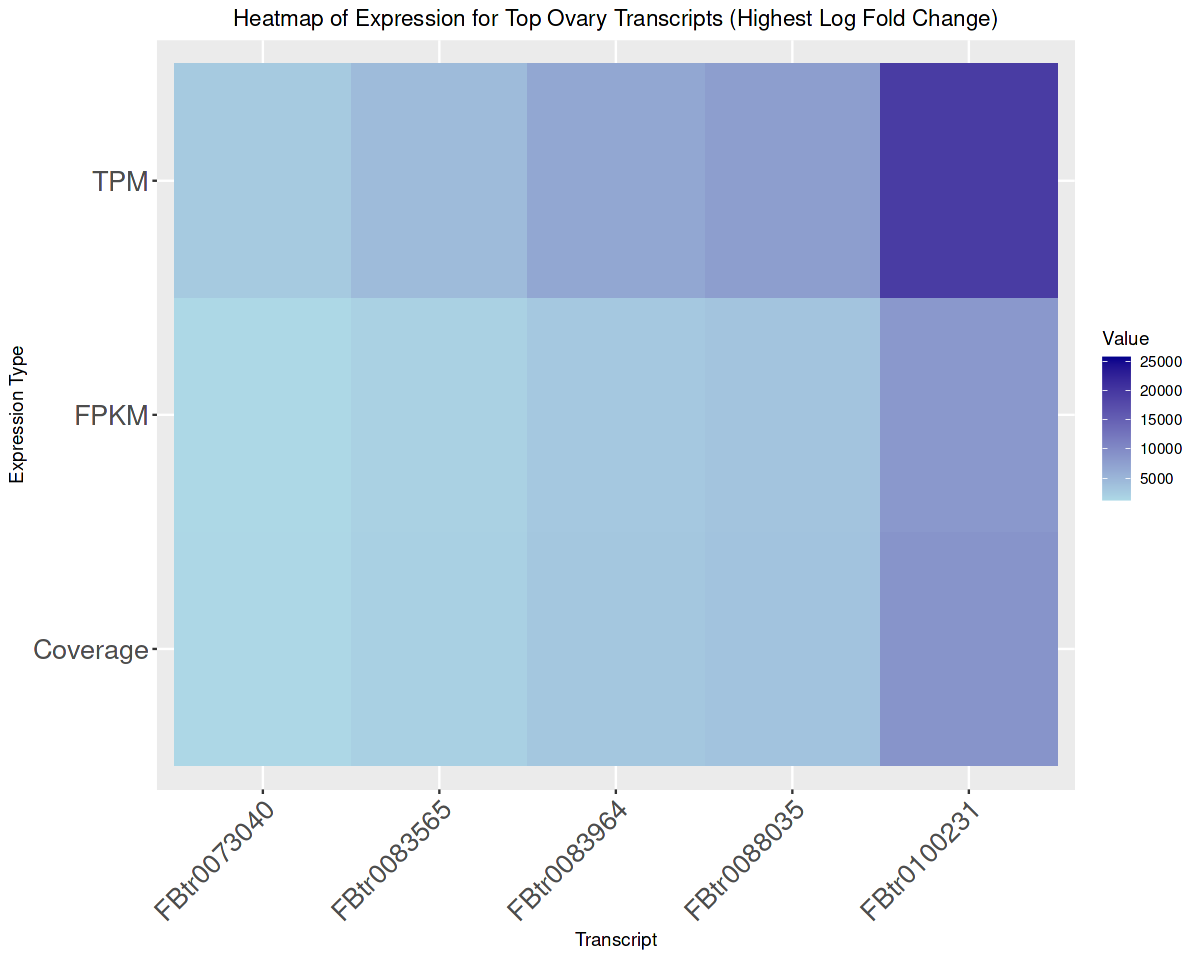

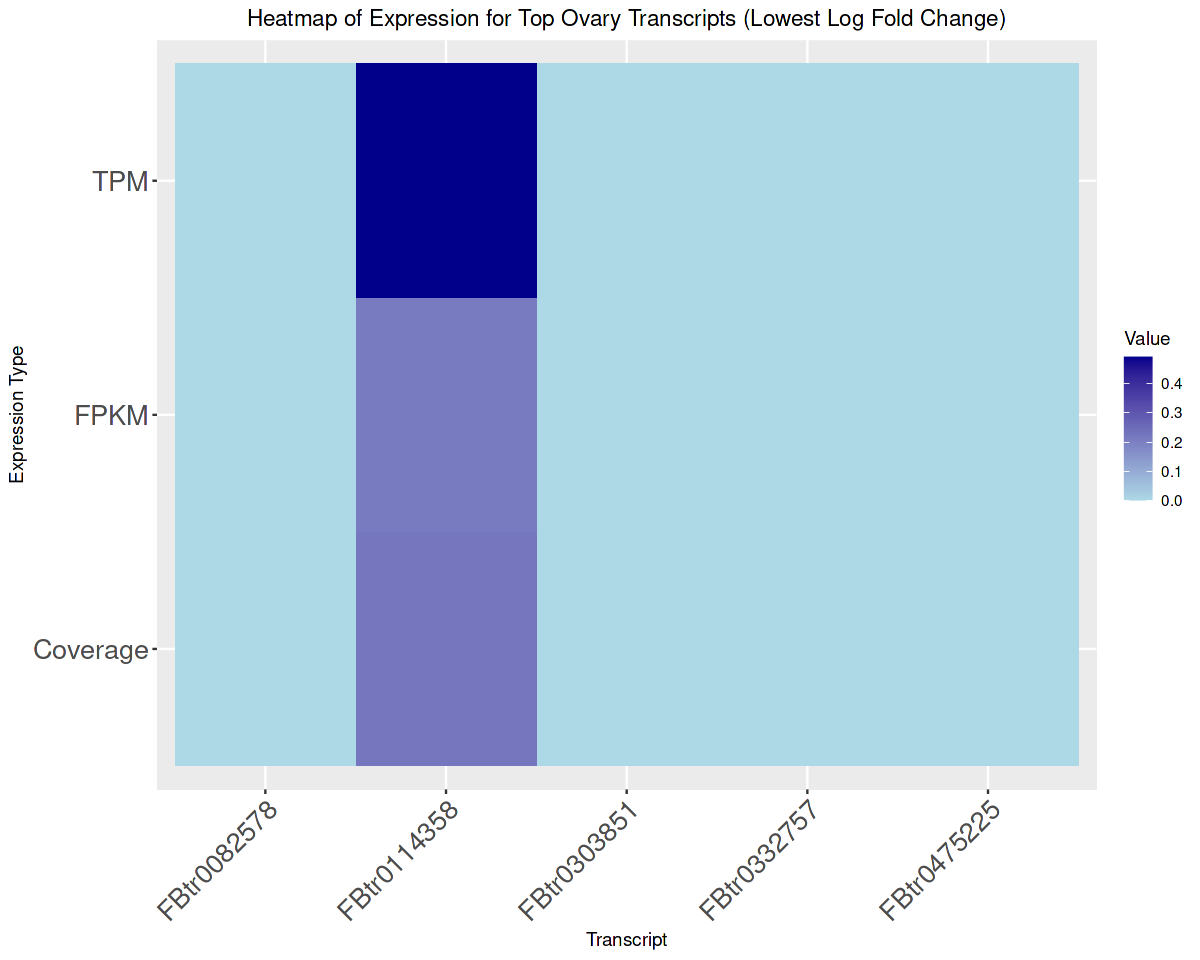

In [265]:
# Add the log fold change values to the data
ovary_merged_transcript$log_fold_change_transcript <- log_fold_change_transcript

#HIGHEST
# Find the top transcripts with the greatest and lowest log fold change values
top_transcripts_greatest <- ovary_merged_transcript %>% arrange(desc(log_fold_change_transcript)) %>% head(5)


# Visualize the expression of top transcripts using a boxplot
# Assuming the columns "Coverage" to "TPM" represent expression values
top_transcripts_names_greatest <- c(top_transcripts_greatest$Transcript.ID)
top_ovary_transcripts_highest <- top_transcripts_names_greatest

# Filter data for top transcripts
ovary_merged_transcript_filtered <- ovary_merged_transcript %>%
  filter(Transcript.ID %in% top_transcripts_names_greatest)

# Pivot the data for heatmap visualization
heatmap_data <- ovary_merged_transcript_filtered %>%
  select(Transcript.ID, Coverage:TPM) %>%
  pivot_longer(cols = -Transcript.ID, names_to = "Expression", values_to = "Value")

# Create a heatmap
options(repr.plot.width = 10, repr.plot.height = 8) 
ggplot(heatmap_data, aes(x = Transcript.ID, y = Expression, fill = Value)) +
  geom_tile() +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "Heatmap of Expression for Top Ovary Transcripts (Highest Log Fold Change)",
       x = "Transcript",
       y = "Expression Type") +
  theme(axis.text.x = element_text(size = 16, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 16),plot.title = element_text(hjust = 0.5))


#LOWEST
top_transcripts_lowest <- ovary_merged_transcript %>% arrange(log_fold_change_transcript) %>% head(5)
top_transcripts_names_lowest <- c(top_transcripts_lowest$Transcript.ID)
top_ovary_transcripts_lowest <- top_transcripts_names_lowest

# Filter data for top transcripts
ovary_merged_transcript_filtered <- ovary_merged_transcript %>%
  filter(Transcript.ID %in% top_transcripts_names_lowest)

# Pivot the data for heatmap visualization
heatmap_data <- ovary_merged_transcript_filtered %>%
  select(Transcript.ID, Coverage:TPM) %>%
  pivot_longer(cols = -Transcript.ID, names_to = "Expression", values_to = "Value")

# Create a heatmap
options(repr.plot.width = 10, repr.plot.height = 8) 
ggplot(heatmap_data, aes(x = Transcript.ID, y = Expression, fill = Value)) +
  geom_tile() +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "Heatmap of Expression for Top Ovary Transcripts (Lowest Log Fold Change)",
       x = "Transcript",
       y = "Expression Type") +
  theme(axis.text.x = element_text(size = 16, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 16),plot.title = element_text(hjust = 0.5))

In [266]:
# Load necessary libraries
library(dplyr) # For data manipulation
library(ggplot2) # For data visualization

# Load the gene abundance data for both ovary and testis replicates
ovary_replicate1_gene <- read.table("/kaggle/input/ovary-and-testis-gene-and-transcript-abundance/gene_abundance_ovary_replicate1.tab", header = TRUE, sep = "\t")
ovary_replicate2_gene <- read.table("/kaggle/input/ovary-and-testis-gene-and-transcript-abundance/gene_abundance_ovary_replicate2.tab", header = TRUE, sep = "\t")
testis_replicate1_gene <- read.table("/kaggle/input/ovary-and-testis-gene-and-transcript-abundance/gene_abundance_testis_replicate1.tab", header = TRUE, sep = "\t")
testis_replicate2_gene <- read.table("/kaggle/input/ovary-and-testis-gene-and-transcript-abundance/gene_abundance_testis_replicate2.tab", header = TRUE, sep = "\t")

testis_merged_gene <- bind_rows(testis_replicate1_gene, testis_replicate2_gene)
ovary_merged_gene <- bind_rows(ovary_replicate1_gene, ovary_replicate2_gene)

# Calculate the average gene abundance for ovary and testis
avg_abundance_ovary <- rowMeans(ovary_merged_gene[, 7:9])
avg_abundance_testis <- rowMeans(testis_merged_gene[, 7:9])

# Calculate the log fold change (r_g)
log_fold_change_gene <- log2((1 + avg_abundance_ovary) / (1 + avg_abundance_testis))


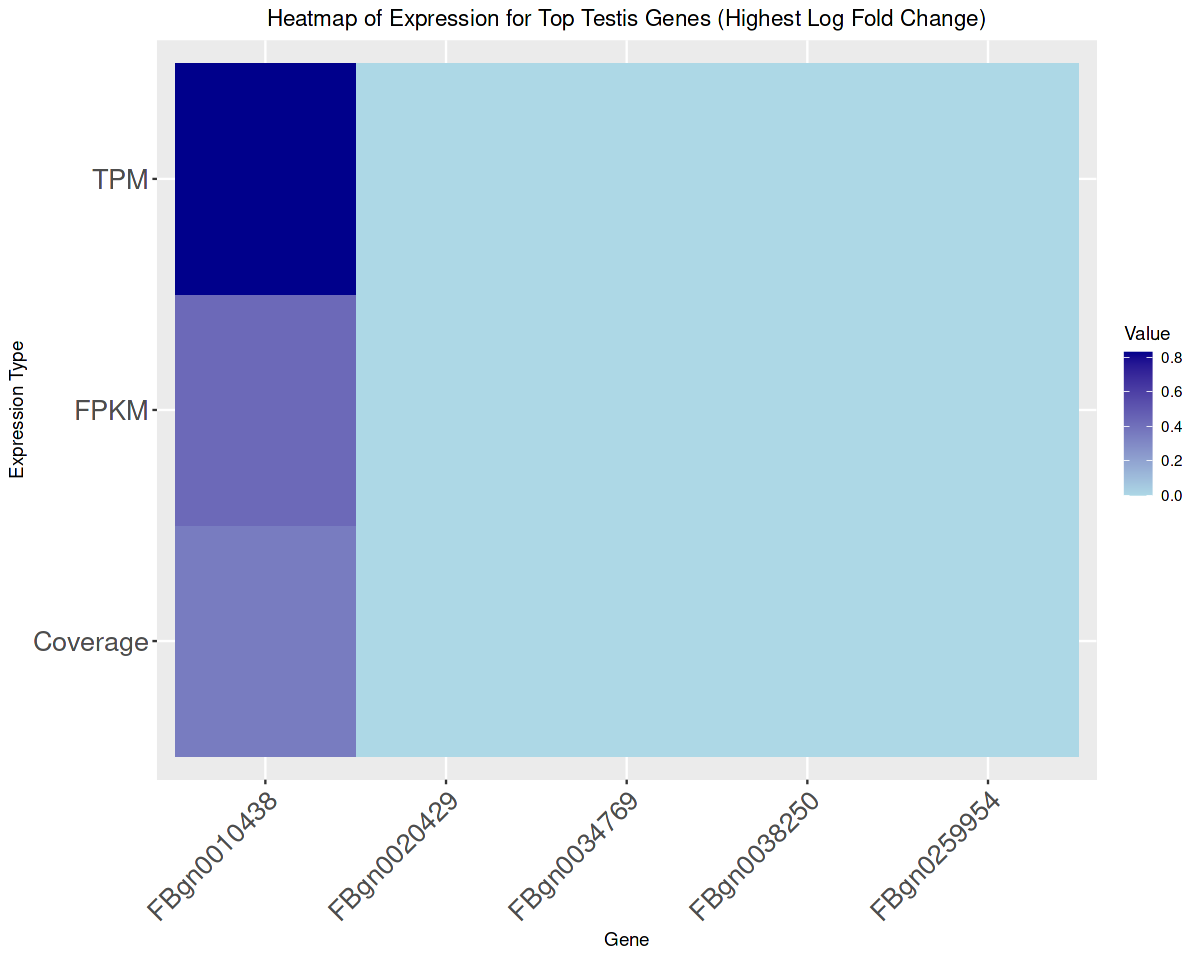

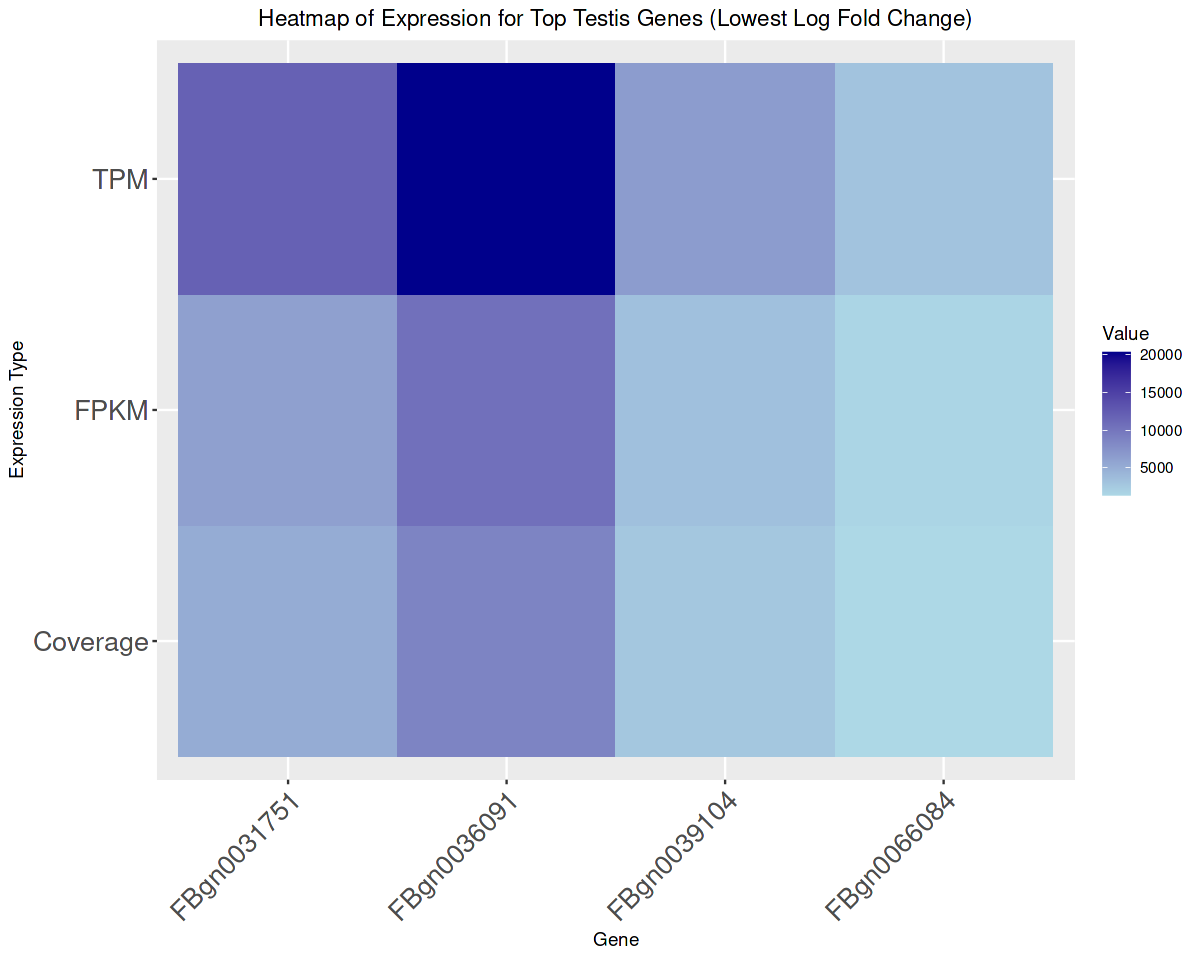

In [267]:
# Add the log fold change values to the data
testis_merged_gene$log_fold_change_gene <- log_fold_change_gene

#HIGHEST
# Find the top genes with the greatest and lowest log fold change values
top_genes_greatest <- testis_merged_gene %>% arrange(desc(log_fold_change_gene)) %>% head(5)


# Visualize the expression of top genes using a boxplot
# Assuming the columns "Coverage" to "TPM" represent expression values
top_genes_names_greatest <- c(top_genes_greatest$Gene.ID)
top_testis_genes_highest <- top_genes_names_greatest

# Filter data for topgenes
testis_merged_gene_filtered <- testis_merged_gene %>%
  filter(Gene.ID %in% top_genes_names_greatest)

# Pivot the data for heatmap visualization
heatmap_data <- testis_merged_gene_filtered %>%
  select(Gene.ID, Coverage:TPM) %>%
  pivot_longer(cols = -Gene.ID, names_to = "Expression", values_to = "Value")

# Create a heatmap
options(repr.plot.width = 10, repr.plot.height = 8) 
ggplot(heatmap_data, aes(x = Gene.ID, y = Expression, fill = Value)) +
  geom_tile() +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "Heatmap of Expression for Top Testis Genes (Highest Log Fold Change)",
       x = "Gene",
       y = "Expression Type") +
  theme(axis.text.x = element_text(size = 16, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 16),plot.title = element_text(hjust = 0.5))


#LOWEST
top_genes_lowest <- testis_merged_gene %>% arrange(log_fold_change_gene) %>% head(5)
top_genes_names_lowest <- c(top_genes_lowest$Gene.ID)
top_testis_genes_lowest <- top_genes_names_lowest

# Filter data for top genes
testis_merged_gene_filtered <- testis_merged_gene %>%
  filter(Gene.ID %in% top_genes_names_lowest)

# Pivot the data for heatmap visualization
heatmap_data <- testis_merged_gene_filtered %>%
  select(Gene.ID, Coverage:TPM) %>%
  pivot_longer(cols = -Gene.ID, names_to = "Expression", values_to = "Value")

# Create a heatmap
options(repr.plot.width = 10, repr.plot.height = 8) 
ggplot(heatmap_data, aes(x = Gene.ID, y = Expression, fill = Value)) +
  geom_tile() +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "Heatmap of Expression for Top Testis Genes (Lowest Log Fold Change)",
       x = "Gene",
       y = "Expression Type") +
  theme(axis.text.x = element_text(size = 16, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 16),plot.title = element_text(hjust = 0.5))

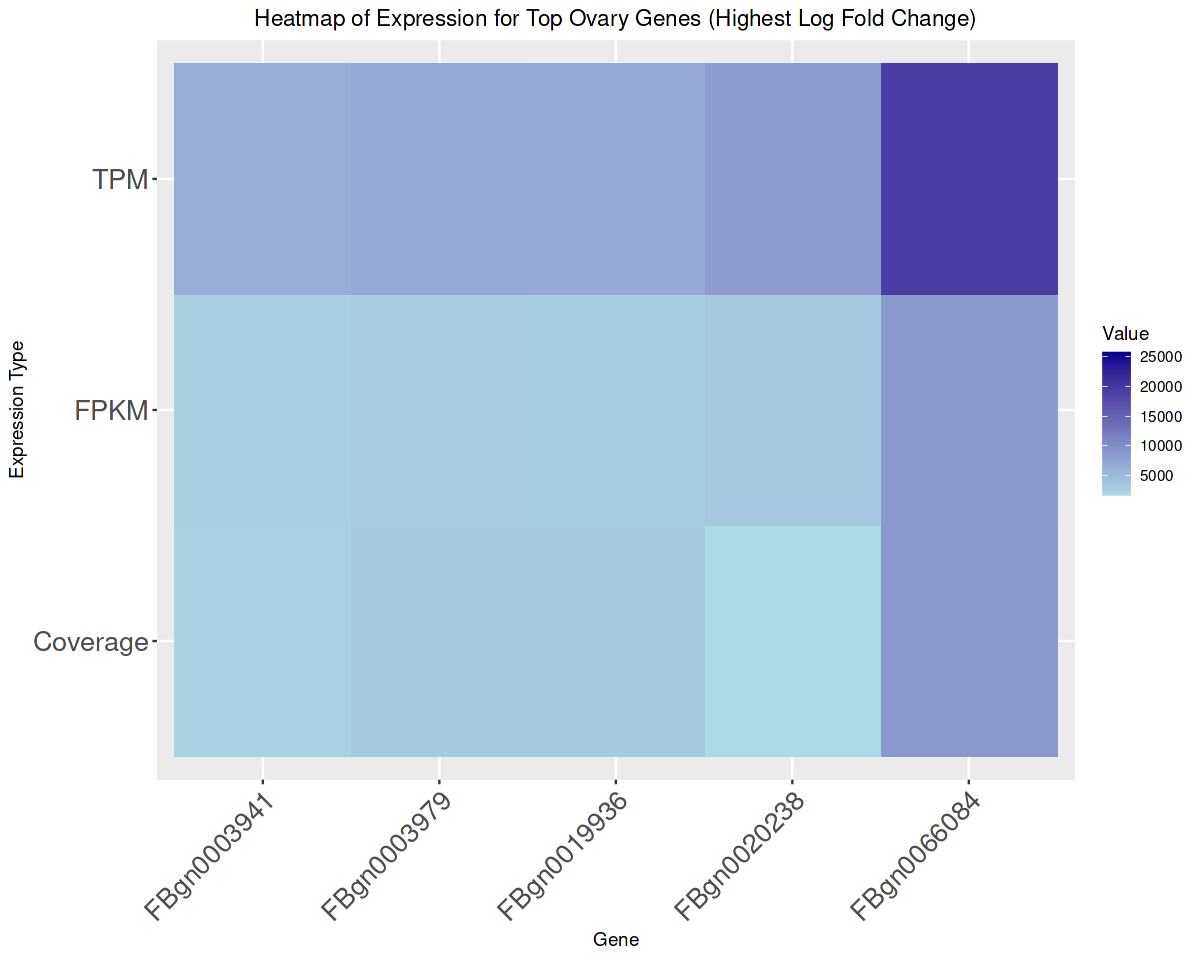

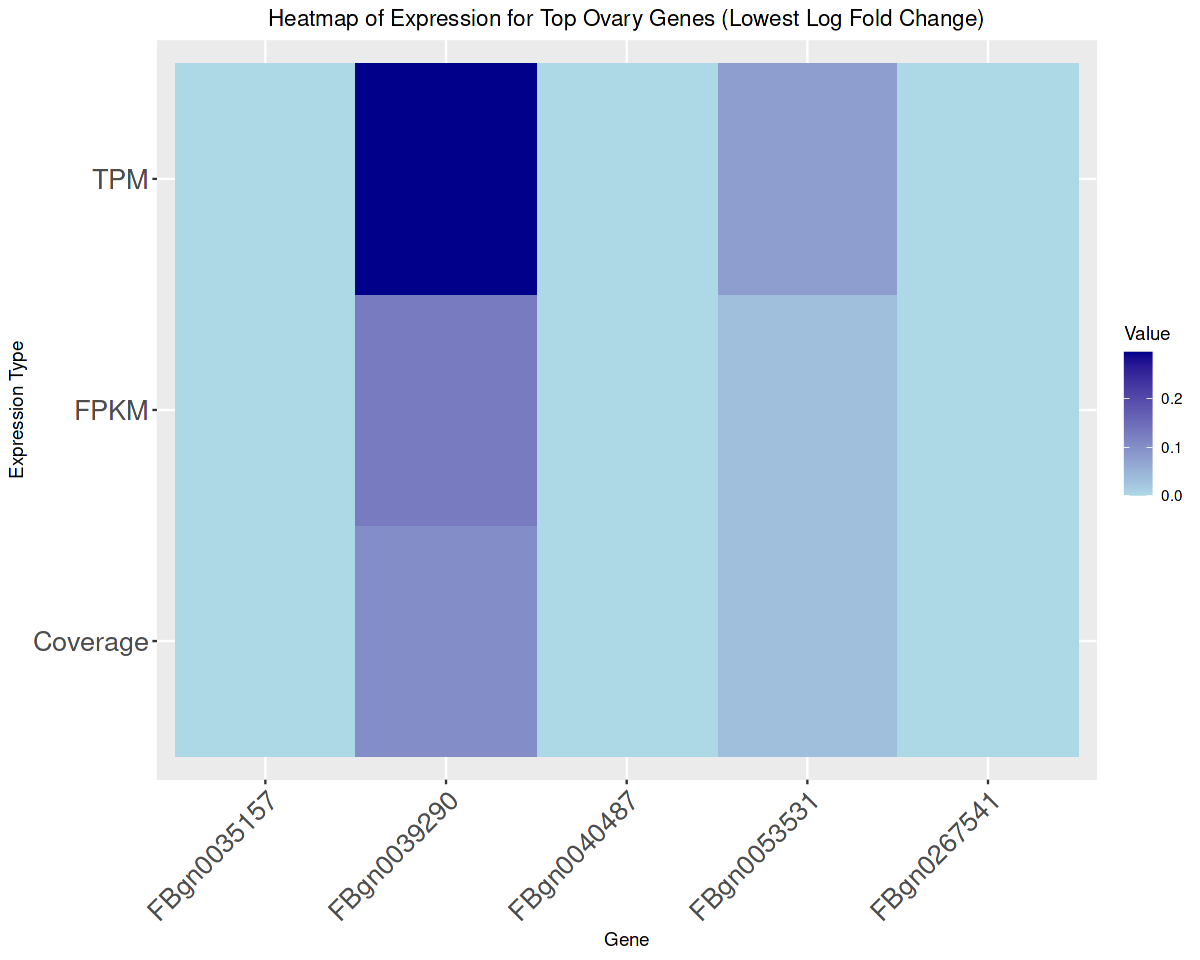

In [268]:
# Add the log fold change values to the data
ovary_merged_gene$log_fold_change_gene <- log_fold_change_gene

#HIGHEST
# Find the top genes with the greatest and lowest log fold change values
top_genes_greatest <- ovary_merged_gene %>% arrange(desc(log_fold_change_gene)) %>% head(5)


# Visualize the expression of top genes using a boxplot
# Assuming the columns "Coverage" to "TPM" represent expression values
top_genes_names_greatest <- c(top_genes_greatest$Gene.ID)
top_ovary_genes_highest <- top_genes_names_greatest

# Filter data for top genes
ovary_merged_gene_filtered <- ovary_merged_gene %>%
  filter(Gene.ID %in% top_genes_names_greatest)

# Pivot the data for heatmap visualization
heatmap_data <- ovary_merged_gene_filtered %>%
  select(Gene.ID, Coverage:TPM) %>%
  pivot_longer(cols = -Gene.ID, names_to = "Expression", values_to = "Value")

# Create a heatmap
options(repr.plot.width = 10, repr.plot.height = 8) 
ggplot(heatmap_data, aes(x = Gene.ID, y = Expression, fill = Value)) +
  geom_tile() +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "Heatmap of Expression for Top Ovary Genes (Highest Log Fold Change)",
       x = "Gene",
       y = "Expression Type") +
  theme(axis.text.x = element_text(size = 16, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 16),plot.title = element_text(hjust = 0.5))


#LOWESTgene
top_genes_lowest <- ovary_merged_gene %>% arrange(log_fold_change_gene) %>% head(5)
top_genes_names_lowest <- c(top_genes_lowest$Gene.ID)
top_ovary_genes_lowest <- top_genes_names_lowest

# Filter data for top genes
ovary_merged_gene_filtered <- ovary_merged_gene %>%
  filter(Gene.ID %in% top_genes_names_lowest)

# Pivot the data for heatmap visualization
heatmap_data <- ovary_merged_gene_filtered %>%
  select(Gene.ID, Coverage:TPM) %>%
  pivot_longer(cols = -Gene.ID, names_to = "Expression", values_to = "Value")

# Create a heatmap
options(repr.plot.width = 10, repr.plot.height = 8) 
ggplot(heatmap_data, aes(x = Gene.ID, y = Expression, fill = Value)) +
  geom_tile() +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "Heatmap of Expression for Top Ovary Genes (Lowest Log Fold Change)",
       x = "Gene",
       y = "Expression Type") +
  theme(axis.text.x = element_text(size = 16, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 16),plot.title = element_text(hjust = 0.5))

In [269]:
cat("Top Testis Genes and Transcripts with highest Log Fold Change\n")
cat("============================================================\n")

filtered_gene_data <- testis_merged_gene %>%
  filter(Gene.ID %in% top_testis_genes_highest)

# Extract the start and end positions for the selected genes
gene_ids <- unique(filtered_gene_data$Gene.ID)
gene_start_positions <- unique(filtered_gene_data$Start)
gene_end_positions <- unique(filtered_gene_data$End)


filtered_transcript_data <- testis_merged_transcript %>%
  filter(Transcript.ID %in% top_testis_transcripts_highest)

# Extract the start and end positions for the selected transcripts
transcript_ids <- unique(filtered_transcript_data$Transcript.ID)
transcripts_start_positions <- unique(filtered_transcript_data$Start)
transcripts_end_positions <- unique(filtered_transcript_data$End)

for (x in 1:length(transcripts_start_positions)) {
    for (y in 1:length(gene_start_positions)) {
      if(gene_end_positions[y] >= transcripts_end_positions[x] & gene_start_positions[y] <= transcripts_start_positions[x])
      {
          cat("Transcript", transcript_ids[x], " is in genomic region of ", gene_ids[y], "gene\n")
      }
  }
}

Top Testis Genes and Transcripts with highest Log Fold Change


In [270]:
cat("Top Testis Genes and Transcripts with lowest Log Fold Change\n")
cat("============================================================\n")

filtered_gene_data <- testis_merged_gene %>%
  filter(Gene.ID %in% top_testis_genes_lowest)

# Extract the start and end positions for the selected genes
gene_ids <- unique(filtered_gene_data$Gene.ID)
gene_start_positions <- unique(filtered_gene_data$Start)
gene_end_positions <- unique(filtered_gene_data$End)


filtered_transcript_data <- testis_merged_transcript %>%
  filter(Transcript.ID %in% top_testis_transcripts_lowest)

# Extract the start and end positions for the selected transcripts
transcript_ids <- unique(filtered_transcript_data$Transcript.ID)
transcripts_start_positions <- unique(filtered_transcript_data$Start)
transcripts_end_positions <- unique(filtered_transcript_data$End)

for (x in 1:length(transcripts_start_positions)) {
    for (y in 1:length(gene_start_positions)) {
      if(gene_end_positions[y] >= transcripts_end_positions[x] & gene_start_positions[y] <= transcripts_start_positions[x])
      {
          cat("Transcript", transcript_ids[x], " is in genomic region of ", gene_ids[y], "gene\n")
      }
  }
}

Top Testis Genes and Transcripts with lowest Log Fold Change
Transcript FBtr0076256  is in genomic region of  FBgn0036091 gene


In [271]:
cat("Top Ovary Genes and Transcripts with highest Log Fold Change\n")
cat("============================================================\n")
filtered_gene_data <- ovary_merged_gene %>%
  filter(Gene.ID %in% top_ovary_genes_highest)

# Extract the start and end positions for the selected genes
gene_ids <- unique(filtered_gene_data$Gene.ID)
gene_start_positions <- unique(filtered_gene_data$Start)
gene_end_positions <- unique(filtered_gene_data$End)


filtered_transcript_data <- ovary_merged_transcript %>%
  filter(Transcript.ID %in% top_ovary_transcripts_highest)

# Extract the start and end positions for the selected transcripts
transcript_ids <- unique(filtered_transcript_data$Transcript.ID)
transcripts_start_positions <- unique(filtered_transcript_data$Start)
transcripts_end_positions <- unique(filtered_transcript_data$End)

for (x in 1:length(transcripts_start_positions)) {
    for (y in 1:length(gene_start_positions)) {
      if(gene_end_positions[y] >= transcripts_end_positions[x] & gene_start_positions[y] <= transcripts_start_positions[x])
      {
          cat("Transcript", transcript_ids[x], " is in genomic region of ", gene_ids[y], "gene\n")
      }
  }
}

Top Ovary Genes and Transcripts with highest Log Fold Change
Transcript FBtr0100231  is in genomic region of  FBgn0066084 gene
Transcript FBtr0083565  is in genomic region of  FBgn0020238 gene
Transcript FBtr0083964  is in genomic region of  FBgn0019936 gene


In [272]:
cat("Top Ovary Genes and Transcripts with lowest Log Fold Change\n")
cat("============================================================\n")
filtered_gene_data <- ovary_merged_gene %>%
  filter(Gene.ID %in% top_ovary_genes_lowest)

# Extract the start and end positions for the selected genes
gene_ids <- unique(filtered_gene_data$Gene.ID)
gene_start_positions <- unique(filtered_gene_data$Start)
gene_end_positions <- unique(filtered_gene_data$End)


filtered_transcript_data <- ovary_merged_transcript %>%
  filter(Transcript.ID %in% top_ovary_transcripts_lowest)

# Extract the start and end positions for the selected transcripts
transcript_ids <- unique(filtered_transcript_data$Transcript.ID)
transcripts_start_positions <- unique(filtered_transcript_data$Start)
transcripts_end_positions <- unique(filtered_transcript_data$End)

for (x in 1:length(transcripts_start_positions)) {
    for (y in 1:length(gene_start_positions)) {
      if(gene_end_positions[y] >= transcripts_end_positions[x] & gene_start_positions[y] <= transcripts_start_positions[x])
      {
          cat("Transcript", transcript_ids[x], " is in genomic region of ", gene_ids[y], "gene\n")
      }
  }
}

Top Ovary Genes and Transcripts with lowest Log Fold Change
